

# Project: Investigating No-Show Appointment Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>An analysis will be performed based on a dataset that collects information from 100k medical appointments in Brazil. The dataset looks at those that attended their appointments, and those that missed their appointments. Data has been provided through [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

> This analysis will look at three questions to determine factors about appointment attendance:
1. Which of the following has the largest sum of no-shows? Scholarship, hipertension, diabetes, alcoholism, handicap?
2. Which neighborhood has the most no-shows? What kind of issues do these patients have?
3. Which day of the week is best for appointments and which day of the week is the worst?
4. Does age and patients with hipertension, diabetes, scholarship, and alcoholism affect no-show appointments? 


<img src="https://www.ophthalmologymanagement.com/content/archive/2013/April/images/OMD_April_A09_Fig01.jpg" alt="Mountain View">

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import datetime as datetime
from matplotlib import style
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties
> Prior to any data clean up, the csv file consists of the following columns:
<br>
<br>
<b>PatientId:</b> Patient identification number.
<br>
<b>AppointmentID:</b> Appointment identification number.
<br>
<b>Gender:</b> Gender of patient (male or female).
<br>
<b>ScheduledDay:</b>The day the patient called to make the appointment. 
<br>
<b>AppointmentDay:</b>The day the patient scheduled the appointment. 
<br>
<b>Age:</b>Age of the patient. 

<br>
<b>Neighbourhood:</b>Appointment location. 
<br>
<b>Scholarship:</b> If a patient receives welfare from [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia), true = 1, false = 2.
<br>
<b>Hipertension:</b>Commonly known as hypertension, or high-blood pressure. If patient has hypertension, true = 1, false = 2.
<br>
<b>Diabetes:</b>If patient has diabetes, true = 1, false = 2.
<br>
<b>Alcoholism:</b>If patient has alcoholism, true = 1, false = 2.
<br>
<b>Handcap:</b>If patient is handicappped, true = 1, false = 2.
<br>
<b>SMS_received:</b>If the patient received a SMS message reminding them of appointment. 
<br>
<b>No-show:</b>If the patient did not show up. Yes = did not show up, no = showed up.

In [3]:
#  df.head() is used to show the first 5 rows and columns of the data set.
df = pd.read_csv('noshows.csv', dtype={'PatientId': object})
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning 

In [4]:
# Checking the size of the df (rows, columns)
df.shape

(110527, 14)

In [5]:
# Change column names to lowercase for the remainder of the analysis
# column handcap will be changed to handicap for legibility
# column hipertension changed to hypertension
# colum no-show to no_show
df.columns = [x.lower() for x in df.columns]
df.rename(columns={'handcap':'handicap', 'hipertension': 'hypertension', 'no-show': 'no_show'}, inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# Check the datatype of the columns

df.dtypes

patientid         object
appointmentid      int64
gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hypertension       int64
diabetes           int64
alcoholism         int64
handicap           int64
sms_received       int64
no_show           object
dtype: object

In [7]:
# scheduledday and appointmentday are both objects and should be datetime objects
# both columns are converted to datetime objects 
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.dtypes

patientid                 object
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
no_show                   object
dtype: object

In [8]:
# scheduledday and appointmentday columns are now converted to day of week
# Monday: 0, Tuesday: 1, Wednesday: 2, Thursday: 3. Friday: 4, Saturday: 5, Sunday: 6

df['scheduledday'] = pd.to_datetime(df['scheduledday'].dt.dayofweek)
df['appointmentday'] = pd.to_datetime(df['appointmentday'].dt.dayofweek)

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 11.8+ MB


No nulls, with all 110527 entries that match all columns.


In [10]:
# check data for any issues
df.describe()

,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


For the sake of legibility, the patientid and appointmentid will be converted to strings.
<br>
Additionally, there seems to be a patient with an age of -1. 

In [11]:
#convert patientid and appointmentid to string, *patientid has been updated to the original import*
df['appointmentid'] = df['appointmentid'].astype(str)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#locate the cell with the age of -1 then drop row 99832

df.query('age == -1')
df.drop(df.index[99832], inplace=True)
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now the minimum age is 0.

In [13]:
#drop any duplicates
df.drop_duplicates(inplace=True)

There is no duplicated data in this dataset. 

In [14]:
df.query('no_show == "No"').count()

patientid         88207
appointmentid     88207
gender            88207
scheduledday      88207
appointmentday    88207
age               88207
neighbourhood     88207
scholarship       88207
hypertension      88207
diabetes          88207
alcoholism        88207
handicap          88207
sms_received      88207
no_show           88207
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Which of the following has the largest sum of no-shows? Scholarship, Hypertension, Diabetes, Alcoholism, Handicap?

In [15]:
# get sum of patients that did not show up enrolled in the scholarship program
scholar_count = df.query('scholarship == 1')
scholar_count = scholar_count.query('no_show == "Yes"').count()
scholar_count

patientid         2578
appointmentid     2578
gender            2578
scheduledday      2578
appointmentday    2578
age               2578
neighbourhood     2578
scholarship       2578
hypertension      2578
diabetes          2578
alcoholism        2578
handicap          2578
sms_received      2578
no_show           2578
dtype: int64

Total patients that did not show up enrolled in the scholarship program: <b>2578</b>
    
  

In [16]:
# get sum of patients that did not show up with hipertension 
hyper_count = df.query('hypertension == 1')
count = hyper_count.query('no_show == "Yes"').count()
count


patientid         3772
appointmentid     3772
gender            3772
scheduledday      3772
appointmentday    3772
age               3772
neighbourhood     3772
scholarship       3772
hypertension      3772
diabetes          3772
alcoholism        3772
handicap          3772
sms_received      3772
no_show           3772
dtype: int64

Total patients that did not show up with hipertension: <b>3772</b>

In [20]:
# get sum of patients that did not show up with diabetes 
diabetes_count = df.query('diabetes == 1')
diabetes_count = diabetes_count.query('no_show == "Yes"').count()
diabetes_count

patientid         1430
appointmentid     1430
gender            1430
scheduledday      1430
appointmentday    1430
age               1430
neighbourhood     1430
scholarship       1430
hypertension      1430
diabetes          1430
alcoholism        1430
handicap          1430
sms_received      1430
no_show           1430
dtype: int64

Total patients that did not show up with diabetes: <b>1430</b>

In [21]:
# get sum of patients that did not show up with alcoholism 
alcoholism_count = df.query('alcoholism == 1')
alcoholism_count = alcoholism_count.query('no_show == "Yes"').count()
alcoholism_count

patientid         677
appointmentid     677
gender            677
scheduledday      677
appointmentday    677
age               677
neighbourhood     677
scholarship       677
hypertension      677
diabetes          677
alcoholism        677
handicap          677
sms_received      677
no_show           677
dtype: int64

Total patients that did not show up with alcoholism: <b>677</b>

In [22]:
# get sum of patients that did not show up with a handicap
handicap_count = df.query('handicap == 1')
handicap_count = handicap_count.query('no_show == "Yes"').count()
handicap_count

patientid         366
appointmentid     366
gender            366
scheduledday      366
appointmentday    366
age               366
neighbourhood     366
scholarship       366
hypertension      366
diabetes          366
alcoholism        366
handicap          366
sms_received      366
no_show           366
dtype: int64

Total patients that did not show up with a handicap: <b>366</b>
<br>
<b>- - - - - - - - - - - - - - - - - - - - - - - - -</b>
<br>


For plotting, the following sums will be used:
<br>
Scholarship: 2578
<br>
Hipertension: 3772
<br>
Diabetes: 1430
<br>
Alcoholism: 677
<br>
Handicap: 366

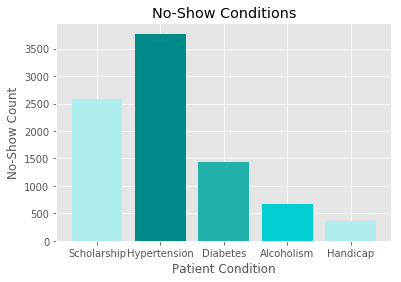

In [37]:
# plot counts of hipertension, diabetes, alcoholism, handicap
style.use('ggplot')
plt.bar([1,2,3,4,5], [2578, 3772, 1430, 677, 366],color=['paleturquoise','darkcyan','lightseagreen','darkturquoise'], align='center')
plt.xticks([1,2,3,4,5],['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap']);
plt.title('No-Show Conditions')
plt.xlabel('Patient Condition')
plt.ylabel('No-Show Count');
           

By analysis of the boxplot above, across all 100k plus patient appointments, those that have hypertension appear to have the most frequent no-shows.
Following hypertension, those that are enrolled in the scholarship program come in second for most no-shows. 
<br>
***It is important to note that some of these patients may have more than one category, such as a patient that has both diabetes and alcoholism. This particular analysis only looks at the sum of each category individually and compares them.**



### Which neighborhood has the most no-shows? What kind of issues do these patients have?

In [24]:
# Continue to explore the data to address your additional research
# Create a mask to show only no-shows and then the value counts of neighborhoods. 
#   investigate.
sum = df.query('no_show == "Yes"')
n_sum = sum['neighbourhood'].value_counts()
n_sum.head()


JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
RESISTÊNCIA        906
CENTRO             703
Name: neighbourhood, dtype: int64

Neighborhood with the maximum amount of no-shows: <b>Jardim Camburi</b>

In [25]:
# next look at the conditions of no-shows in Jardin Camburi
jardim = df.query('neighbourhood == "JARDIM CAMBURI"')
jardim.sum()

patientid        7746485718662943553444618312239834569825253471...
appointmentid    5638014563699955905145583419556270755616245564...
gender           FFMFFFMFMFMMFFFFFMMMMFFFMMFMFFFFFFMMMMFMFFFFFM...
age                                                         337476
neighbourhood    JARDIM CAMBURIJARDIM CAMBURIJARDIM CAMBURIJARD...
scholarship                                                    159
hypertension                                                   509
diabetes                                                       251
alcoholism                                                      10
handicap                                                         6
sms_received                                                  2575
no_show          NoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNo...
dtype: object

Now we will plot the data shown which issues the patients at Jardim Camburi have. 

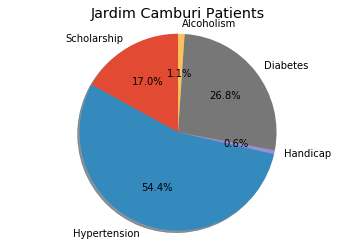

In [122]:
labels = 'Scholarship', 'Hypertension','Handicap', 'Diabetes', 'Alcoholism'
sizes = [159, 509, 6, 251, 10]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Jardim Camburi Patients')

plt.show()

In conclusion, the neighborhood that experiences the most no-shows is at the Jardin Camburi location. The largest categories for these no-show patients is that they have hypertension, followed by diabetes, then are enrolled in scholarship. 
<br>
<br>
To follow up, we will plot the number of no-shows by neighborhood below:


In [112]:
#find top ten no-show neighborhoods
n_sum.head(10)

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: neighbourhood, dtype: int64

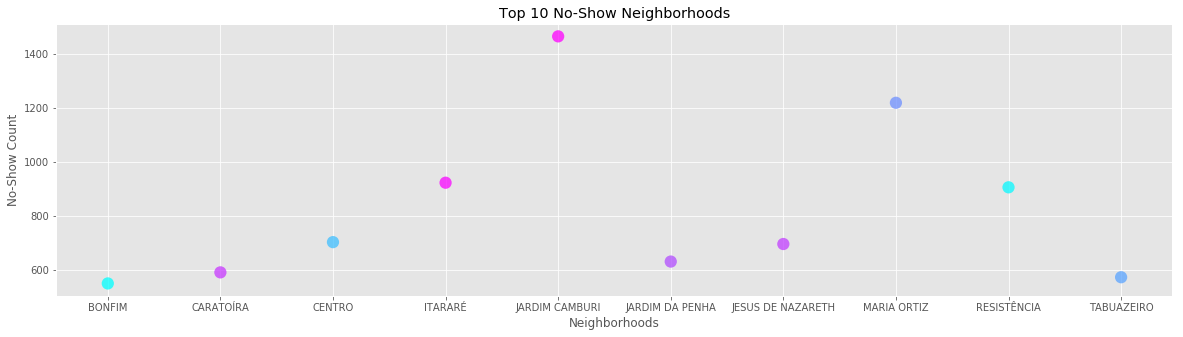

In [124]:
#create a scatter plot to show neighborhoods
x = ['JARDIM CAMBURI', 'MARIA ORTIZ', 'ITARARÉ', 'RESISTÊNCIA', 'CENTRO', 'JESUS DE NAZARETH', 'JARDIM DA PENHA', 'CARATOÍRA', 'TABUAZEIRO', 'BONFIM'] 
y = [1465, 1219, 923, 906, 703, 696, 631, 591, 573, 550]
z=np.random.rand(10)
plt.figure(1, [20,5])
plt.scatter(x, y, c=z, s=150, cmap=plt.cm.cool, edgecolors='None', alpha=0.75)
plt.title('Top 10 No-Show Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('No-Show Count');



plt.show()

### Which day of the week is best for appointments and which day of the week is worst?

In [27]:
# day counts for patients that did show up 
yes_show = df.query('no_show == "No"')
yes_show.groupby('scheduledday').count()


,patientid,appointmentid,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
scheduledday,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,18523,18523,18523,18523,18523,18523,18523,18523,18523,18523,18523,18523,18523
1970-01-01 00:00:00.000000001,20877,20877,20877,20877,20877,20877,20877,20877,20877,20877,20877,20877,20877
1970-01-01 00:00:00.000000002,19383,19383,19383,19383,19383,19383,19383,19383,19383,19383,19383,19383,19383
1970-01-01 00:00:00.000000003,14373,14373,14373,14373,14373,14373,14373,14373,14373,14373,14373,14373,14373
1970-01-01 00:00:00.000000004,15028,15028,15028,15028,15028,15028,15028,15028,15028,15028,15028,15028,15028
1970-01-01 00:00:00.000000005,23,23,23,23,23,23,23,23,23,23,23,23,23


Day counts for patients that <b>showed up</b> to their appointments:
<br>
<br>
[Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
<br>
[18524, 20877, 19383, 14373, 15028, 23]

In [28]:
# day counts for patients that did not show up 
no_show = df.query('no_show == "Yes"')
no_show.groupby('scheduledday').count()


,patientid,appointmentid,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
scheduledday,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561,4561
1970-01-01 00:00:00.000000001,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291
1970-01-01 00:00:00.000000002,4879,4879,4879,4879,4879,4879,4879,4879,4879,4879,4879,4879,4879
1970-01-01 00:00:00.000000003,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700,3700
1970-01-01 00:00:00.000000004,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887,3887
1970-01-01 00:00:00.000000005,1,1,1,1,1,1,1,1,1,1,1,1,1


Day counts for patients that <b>did not show up</b> to their appointments:
<br>
<br>
[Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
<br>
[4561, 5291, 4879, 3700, 3887, 1]

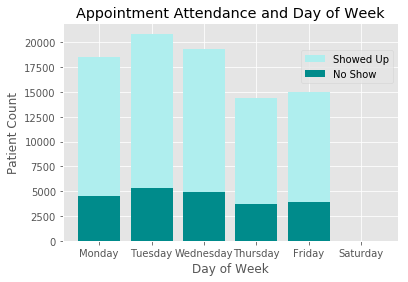

In [119]:
style.use('ggplot')

x = [1,2,3,4,5,6]
y = [18524, 20877, 19383, 14373, 15028, 23]
y2 = [4561, 5291, 4879, 3700, 3887, 1]


plt.bar(x, y, color='paleturquoise', align='center', label='Showed Up')

plt.bar(x, y2, color='darkcyan', align='center', label='No Show')

plt.xticks([1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Appointment Attendance and Day of Week')
plt.ylabel('Patient Count')
plt.xlabel('Day of Week')
plt.legend(bbox_to_anchor=(1, .9), prop ={'size':10})


plt.show()


After reviewing the barchart above, it appears that Tuesday is the most popular day of week for appointment attendance as well as the most popular day for no-shows. Tuesday appears to be the most popular day to schedule an apppointment in general. 

### Below we will look at patient conditions and age and if they showed up to their appointments

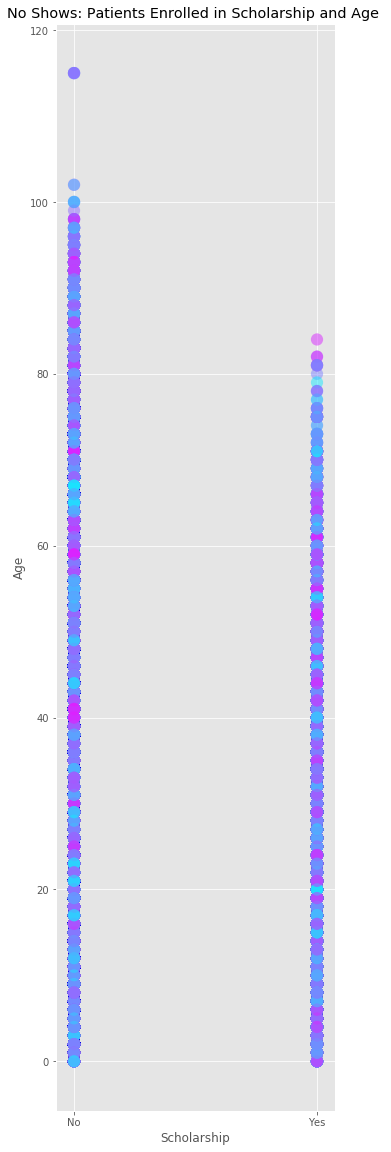

In [155]:
#no: showed up for their appointment
#yes: no show for their appointent
x= df['scholarship']
y= df['age']
z=np.random.rand(110526)
plt.figure(1, [5,20])
plt.scatter(x, y, c=z, s=150, cmap=plt.cm.cool, edgecolors='None', alpha=0.5)
plt.title('No Shows: Patients Enrolled in Scholarship and Age ')
plt.xlabel('Scholarship')
plt.ylabel('Age')
plt.xticks([0,1],['No','Yes']);

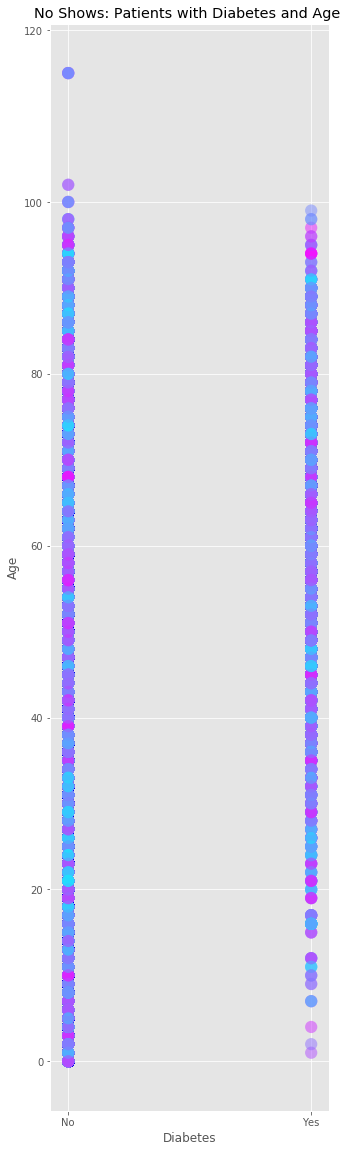

In [156]:
#no: showed up for their appointment
#yes: no show for their appointent
x= df['diabetes']
y= df['age']
z=np.random.rand(110526)
plt.figure(1, [5,20])
plt.scatter(x, y, c=z, s=150, cmap=plt.cm.cool, edgecolors='None', alpha=0.5)
plt.title('No Shows: Patients with Diabetes and Age ')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.xticks([0,1],['No','Yes']);

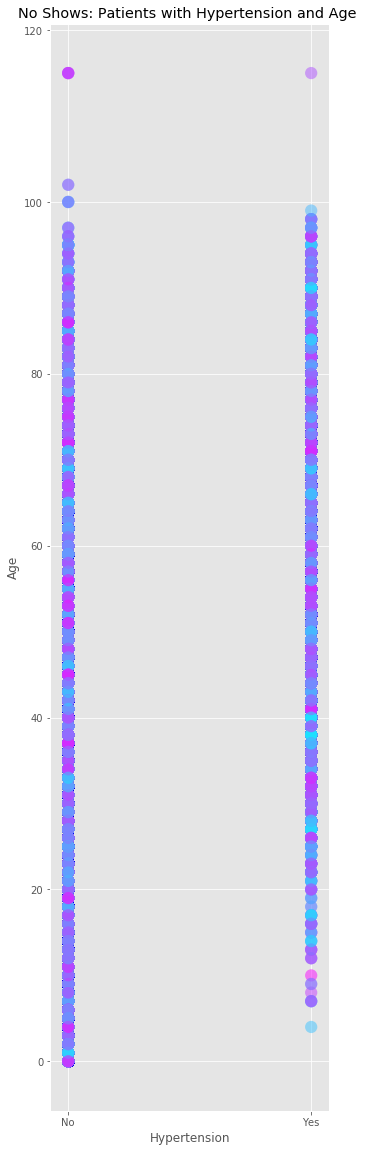

In [154]:
#no: showed up for their appointment
#yes: no show for their appointent
x= df['hypertension']
y= df['age']
z=np.random.rand(110526)
plt.figure(1, [5,20])
plt.scatter(x, y, c=z, s=150, cmap=plt.cm.cool, edgecolors='None', alpha=0.5)
plt.title('No Shows: Patients with Hypertension and Age ')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.xticks([0,1],['No','Yes']);

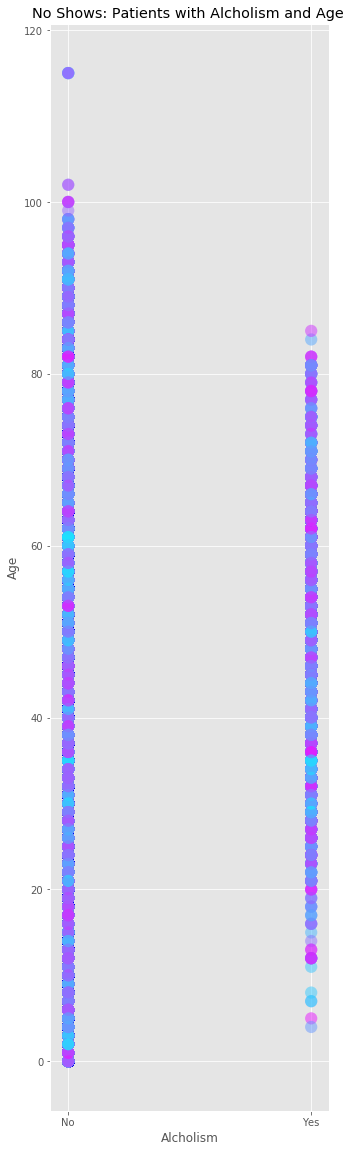

In [157]:
#no: showed up for their appointment
#yes: no show for their appointent
x= df['alcoholism']
y= df['age']
z=np.random.rand(110526)
plt.figure(1, [5,20])
plt.scatter(x, y, c=z, s=150, cmap=plt.cm.cool, edgecolors='None', alpha=0.5)
plt.title('No Shows: Patients with Alcholism and Age ')
plt.xlabel('Alcholism')
plt.ylabel('Age')
plt.xticks([0,1],['No','Yes']);

As a result of the scatterplots, it appears that patients with alcoholism and those enrolled in scholarship had the least amount of older aged no-shows. Those that had diabetes had the largest amount of older aged no-shows. 

<a id='conclusions'></a>
## Conclusions

> **Limitations**: Some of my limitations included the following:
<br>
1. Most of the analysis is only based on what is visualised through the data. There is no supplmemental information on what could be a reason for more no-shows vs less. For example, there seemed to be no data on Sundays so are hospitals in Brazil closed on this day?
<br>
2. This analysis was limited by categorizing sums and their maximums; while there could be several patients that held several categories such as having hypertension and other issues like diabetes, or handicap, etc. 
<br>

> **In Conclusion**: 
<br>
1. Across the entire dataset, hypertension seems to be most common with no-show appointment patients. 
<br>
2. Jardin Camburi is the neighborhood hospital that has the largest quantity of no-show appointments. The top condition these no-show patients have is hypertension followed by diabetes. 
<br>
3. Rather than a specific day that has the most patients show up and a specific day that has the most no-shows, Tuesday seems to be the most popular day of the week for scheduling appointments. As a result of this, there is maximums in both categories for appointment attendance. Thursday seems to be the least popular day for appointments. 
<br>
4. Older aged patients appear to have the most no-shows when diagnosed with diabetes. 


Resources: https://stackoverflow.com/questions/17868024/matplotlib-python-scatter-plot
<br>
https://stackoverflow.com/questions/29300734/labels-of-the-axis-from-overlapping-each-other
